# A base de dados

### Carregando o dataset

In [ ]:
# from google.colab import files
# files.upload()

In [1]:
import pandas as pd

dados = pd.read_csv('Bicicletas.csv')

### Conhecendo a base de dados

In [2]:
dados.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [3]:
dados.shape

(731, 3)

In [4]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'temperatura')

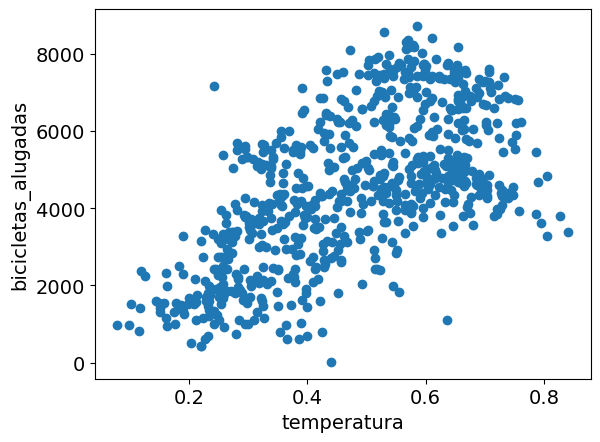

In [ ]:
plt.rcParams.update({'font.size': 14})
plt.scatter(dados['temperatura'], dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')

([<matplotlib.axis.XTick at 0x7f708b902b10>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

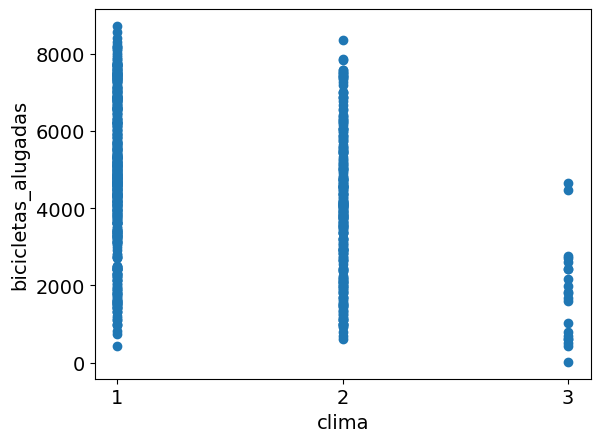

In [ ]:
plt.scatter(dados['clima'], dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice = [1, 2, 3]
plt.xticks(indice, fontsize=14)

### Normalizando a base de dados

In [7]:
import numpy as np

In [9]:
y = dados['bicicletas_alugadas'].values
y

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425,
       1536, 1685, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
       2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944,
       4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351,
       4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
       4105, 3409, 4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274,
       4492, 4978, 4677, 4679, 4758, 4788, 4098, 39

In [ ]:
X = dados[['clima', 'temperatura']].values
X

array([[2.      , 0.363625],
       [2.      , 0.353739],
       [1.      , 0.189405],
       ...,
       [2.      , 0.2424  ],
       [1.      , 0.2317  ],
       [2.      , 0.223487]])

In [ ]:
X = X / np.amax(X, axis=0)
X

array([[0.66666667, 0.43242565],
       [0.66666667, 0.42066914],
       [0.33333333, 0.22524188],
       ...,
       [0.66666667, 0.28826395],
       [0.33333333, 0.27553942],
       [0.66666667, 0.26577246]])

In [ ]:
ymax = np.amax(y)
y = y / ymax
y

array([0.11303649, 0.09192105, 0.15480835, 0.17925178, 0.18361258,
       0.18430112, 0.17328437, 0.11005279, 0.09433096, 0.15159513,
       0.14493918, 0.13334863, 0.16134955, 0.16307092, 0.14321781,
       0.13816846, 0.11475786, 0.07837962, 0.18935047, 0.2211384 ,
       0.17707138, 0.11257746, 0.11315125, 0.16249713, 0.22779435,
       0.05806748, 0.04946064, 0.13392242, 0.12600413, 0.12577462,
       0.17225155, 0.15607069, 0.1751205 , 0.17787468, 0.19600643,
       0.11533165, 0.18625201, 0.19646546, 0.17557953, 0.18418637,
       0.17649759, 0.20036723, 0.16892357, 0.18235024, 0.21953179,
       0.20828552, 0.24271288, 0.28402571, 0.33589626, 0.1876291 ,
       0.20794124, 0.12703695, 0.1663989 , 0.21999082, 0.20736745,
       0.16766123, 0.22595823, 0.27564838, 0.16593987, 0.2124168 ,
       0.24489328, 0.193367  , 0.22308928, 0.23835208, 0.06942851,
       0.21482672, 0.24477852, 0.21700711, 0.07149415, 0.22687629,
       0.24466376, 0.27736975, 0.23479458, 0.23594216, 0.25154

### Funções de ativação

In [ ]:
def sigmoid(Soma):
  return 1 / (1 + np.exp(-Soma))


def relu(Soma):
  return np.maximum(0, Soma)

### Criando a estrutura da rede

In [15]:
arquitetura = [
    {"dim_entrada": 2, "dim_saida": 50, "ativacao": "relu"},
    {"dim_entrada": 50, "dim_saida": 1, "ativacao": "sigmoid"},
]

### Pesos e viés

In [ ]:
def inicia_camadas(arquitetura, seed=99):
  # inicia os valores aleatórios
  np.random.seed(seed)
  # numero de camadas da rede neural
  numero_de_camadas = len(arquitetura)
  # inicia armazenamento de parametros
  valores_parametros = {}

  # itera nas camadas da rede
  for indice, camada in enumerate(arquitetura):

    indice_camada = indice + 1

    # extrai o numero de nodos nas camadas
    tamanho_camada_entrada = camada["dim_entrada"]
    tamanho_camada_saida = camada["dim_saida"]

    # inicia os valores na matriz de pesos P
    # e o vetor de viés ou bias b
    valores_parametros['P' + str(indice_camada)] = np.random.randn(
        tamanho_camada_saida, tamanho_camada_entrada) * 0.1
    valores_parametros['b' + str(indice_camada)] = np.random.randn(
        tamanho_camada_saida, 1) * 0.1

  return valores_parametros

### Propagação da rede

In [ ]:
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao="relu"):
  # cálculo da entrada para a função de ativação
  Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual

  # selecção da função de ativação
  if "relu" == ativacao:
    func_ativacao = relu
    # print('Função de ativação: RELU')
  elif "sigmoid" in ativacao:
    func_ativacao = sigmoid
    # print('Função de ativação: SIGMOID')
  else:
    raise Exception('Ainda não implementamos essa funcao')

  # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
  return func_ativacao(Saida_atual), Saida_atual

In [ ]:
def propaga_total(X, valores_parametros, arquitetura):
  # memoria temporaria para a retropropagacao
  memoria = {}
  # O vetor X é a ativação para a camada 0 
  Ativado_atual = X

  # iterações para as camadas
  for indice, camada in enumerate(arquitetura):
    # a numeração das camadas começa de 1
    indice_camada = indice + 1
    # utiliza a ativação da iteração anterior
    Ativado_anterior = Ativado_atual

    # extrai a função de ativação para a camada atual
    func_ativacao_atual = camada["ativacao"]
    # extrai os pesos da camada atual
    Pesos_atual = valores_parametros["P" + str(indice_camada)]
    # extrai o bias para a camada atual
    b_atual = valores_parametros["b" + str(indice_camada)]
    # cálculo da ativação para a camada atual
    Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)

    # salca os valores calculados na memória
    memoria["A" + str(indice)] = Ativado_anterior
    memoria["Z" + str(indice_camada)] = Saida_atual

  # retorna o vetor predito e um dicionário contendo os valores intermediários
  return Ativado_atual, memoria

### Testando a rede

In [ ]:
valores_parametros = inicia_camadas(arquitetura, seed=99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

Função de ativação: RELU
Função de ativação: SIGMOID


In [ ]:
y_estimado[0, 0] * ymax

0.5255890483427204

In [ ]:
y[0] * ymax

0.11303649299977049

### Atualização dos pesos

In [ ]:
def atualiza(valores_parametros, gradidentes, arquitetura, taxa_aprendizagem):

  # iterações pelas camadas
  for indice_camada, camada in enumerate(arquitetura, 1):
    valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["dP" + str(indice_camada)]
    valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["db" + str(indice_camada)]

  return valores_parametros

### Função de custo

In [ ]:
def valor_de_custo(Y_predito, Y):
  # numero_de_exemplos
  m = Y_predito.shape[1]

  custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
  return np.squeeze(custo)

### Retropropagação

In [ ]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):

  gradientes = {}

  # numero de exemplos
  # m = Y.shape[1]
  # para garantir que os dois vetores tenham a mesma dimensão
  Y = Y.reshape(Y_predito.shape)

  # inicia o algoritmo de gradiente descendente
  dAtivado_anterior = - (np.divide(Y, Y_predito) - np.divide(1 - Y, 1 - Y_predito))

  for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):

    indice_camada_atual = indice_camada_anterior + 1
    # Função de ativação para a camada atual

    funcao_ativao_atual = camada["ativacao"]

    dAtivado_atual = dAtivado_anterior

    Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
    Saida_atual = memoria["Z" + str(indice_camada_atual)]

    Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
    b_atual = valores_parametros["b" + str(indice_camada_atual)]

    dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
        dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, funcao_ativao_atual)

    gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
    gradientes["db" + str(indice_camada_atual)] = db_atual

  return gradientes

In [ ]:
def sigmoid_retro(dAtivado, Saida):
  sig = sigmoid(Saida)
  return dAtivado * sig * (1 - sig)


def relu_retro(dAtivado, Saida):
  dSaida = np.array(dAtivado, copy=True)
  dSaida[Saida <= 0] = 0
  return dSaida

In [ ]:
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, ativacao="relu"):
  # número de exemplos
  m = Ativado_anterior.shape[1]

  # seleção função de ativação
  if ativacao == "relu":
    func_ativacao_retro = relu_retro
    # print('Função de ativação: RELU')
  elif ativacao == "sigmoid":
    func_ativacao_retro = sigmoid_retro
    # print('Função de ativação: SIGMOID')
  else:
    raise Exception('Ainda não implementamos essa funcao')

  # derivada da função de ativação
  dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)

  # derivada da matriz de Pesos
  dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
  # derivada do vetor b
  db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
  # derivada da matriz A_anterior
  dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

  return dAtivado_anterior, dPesos_atual, db_atual

### Treinamento

In [ ]:
def treino(X, Y, X_teste, Y_teste, arquitetura, epocas, taxa_aprendizagem):
  # Inicia os parâmetros da rede neural
  valores_parametros = inicia_camadas(arquitetura, 2)
  # Listas que vão guardar o progresso da aprendizagem da rede
  historia_custo = []
  historia_custo_teste = []

  # Atualiza a cada época
  for i in range(epocas):
    # Propaga a rede - Foward propagation
    Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)

    Y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros,
                                              arquitetura)

    # calcula as métricas e salva nas listas de história
    custo = valor_de_custo(Y_predito, Y)
    historia_custo.append(custo)
    custo_teste = valor_de_custo(Y_predito_teste, Y_teste)
    historia_custo_teste.append(custo_teste)

    # Retropropagação - Backpropagation
    gradientes = retropropagacao_total(Y_predito, Y, memoria,
                                       valores_parametros, arquitetura)
    # Atualiza os pesos
    valores_parametros = atualiza(valores_parametros, gradientes,
                                  arquitetura, taxa_aprendizagem)

    if (i % 50 == 0):

      print("Iteração: {:05} - custo: {:.5f} ".format(i, custo))

  return valores_parametros, historia_custo, historia_custo_teste

In [40]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.43, random_state=42)

In [ ]:
# Treinamento
valores_parametros, historia_custo, historia_custo_teste = treino(np.transpose(X_treino), np.transpose(y_treino.reshape((y_treino.shape[0], 1))),
                                                                  np.transpose(X_teste), np.transpose(y_teste.reshape((y_teste.shape[0], 1))),
                                                                  arquitetura, 20000, 0.01)

Iteração: 00000 - custo: 0.69396 
Iteração: 00050 - custo: 0.69246 
Iteração: 00100 - custo: 0.69136 
Iteração: 00150 - custo: 0.69054 
Iteração: 00200 - custo: 0.68991 
Iteração: 00250 - custo: 0.68939 
Iteração: 00300 - custo: 0.68894 
Iteração: 00350 - custo: 0.68852 
Iteração: 00400 - custo: 0.68812 
Iteração: 00450 - custo: 0.68773 
Iteração: 00500 - custo: 0.68735 
Iteração: 00550 - custo: 0.68700 
Iteração: 00600 - custo: 0.68667 
Iteração: 00650 - custo: 0.68635 
Iteração: 00700 - custo: 0.68605 
Iteração: 00750 - custo: 0.68575 
Iteração: 00800 - custo: 0.68545 
Iteração: 00850 - custo: 0.68515 
Iteração: 00900 - custo: 0.68485 
Iteração: 00950 - custo: 0.68455 
Iteração: 01000 - custo: 0.68424 
Iteração: 01050 - custo: 0.68394 
Iteração: 01100 - custo: 0.68363 
Iteração: 01150 - custo: 0.68333 
Iteração: 01200 - custo: 0.68302 
Iteração: 01250 - custo: 0.68271 
Iteração: 01300 - custo: 0.68239 
Iteração: 01350 - custo: 0.68208 
Iteração: 01400 - custo: 0.68176 
Iteração: 0145

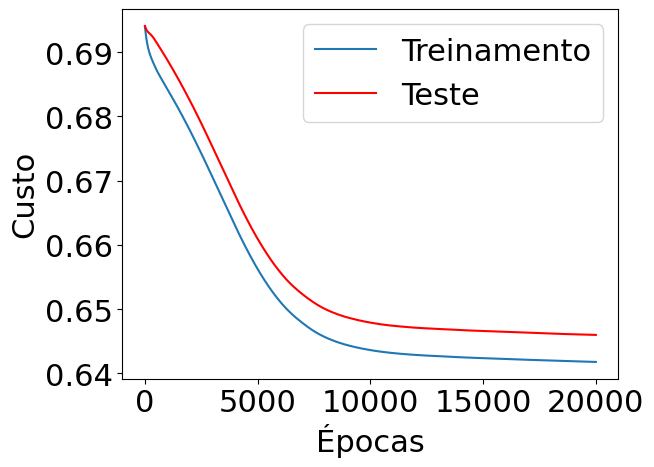

In [ ]:
plt.plot(historia_custo)
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento', 'Teste'])
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.show()

### Fazendo Previsões

In [51]:
# Previsão
Y_pred, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)
Y_pred

array([[0.58025197, 0.29244623, 0.32095162, 0.41554659, 0.63361557,
        0.69448898, 0.18830104, 0.4860635 , 0.64790422, 0.70677027,
        0.34065792, 0.42446932, 0.66146696, 0.39660918, 0.40921507,
        0.43281085, 0.4391834 , 0.65488066, 0.69552207, 0.30353498,
        0.68648165, 0.76361195, 0.49652035, 0.34698247, 0.29479188,
        0.68367866, 0.33847597, 0.60768425, 0.3694035 , 0.51942369,
        0.36091241, 0.53097996, 0.58152694, 0.64859513, 0.54679215,
        0.48661275, 0.6351768 , 0.61712022, 0.42894859, 0.21798606,
        0.64562297, 0.36272004, 0.70372508, 0.61590528, 0.71578074,
        0.29675071, 0.72301629, 0.57066733, 0.71012824, 0.43602254,
        0.62157052, 0.35369984, 0.4060532 , 0.73553819, 0.69205893,
        0.60703973, 0.52319491, 0.44696354, 0.67517908, 0.6799229 ,
        0.62679207, 0.66328714, 0.32609418, 0.67660241, 0.59828219,
        0.73172968, 0.73743889, 0.7361689 , 0.37736372, 0.6448755 ,
        0.5776958 , 0.50045941, 0.39222926, 0.60

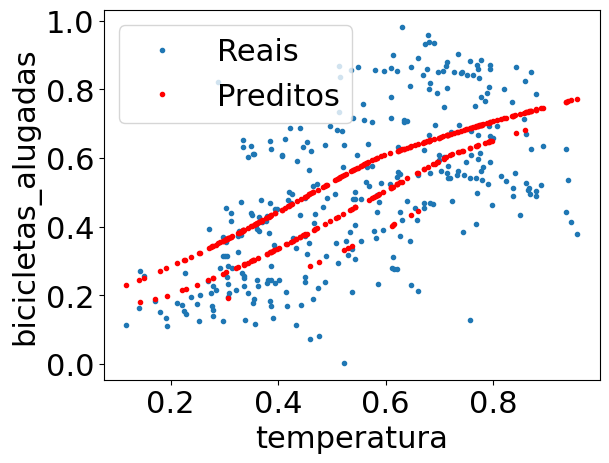

In [ ]:
plt.plot(np.transpose(X_teste)[1], ymax * y_teste, '.')
plt.plot(np.transpose(X_teste)[1], ymax * Y_pred.reshape([-1, 1]), '.r')
plt.legend(['Reais', 'Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')
plt.show()

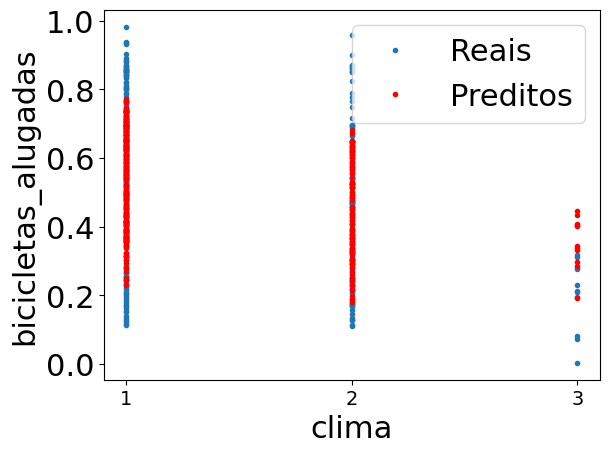

In [ ]:
plt.plot(3 * np.transpose(X_teste)[0], ymax * y_teste, '.')
plt.plot(3 * np.transpose(X_teste)[0], ymax * Y_pred.reshape([-1, 1]), '.r')
plt.legend(['Reais', 'Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice = [1, 2, 3]
plt.xticks(indice, fontsize=14)
plt.show()